In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle as pkl
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [3]:

train_data = pd.read_csv("/home/abhishek/Documents/Aayush_Dyslexia/Dysgraphia-Prediction-Model/flask_server/quizData/labeled_dysx.csv")
test_data = pd.read_csv("/home/abhishek/Documents/Aayush_Dyslexia/Dysgraphia-Prediction-Model/flask_server/quizData/unlabeled_dysx.csv")
train_data.head()

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1
1,0.6,0.7,0.8,0.9,0.5,0.8,2
2,0.6,0.4,0.3,0.3,0.4,0.6,1
3,0.3,0.5,0.2,0.1,0.3,0.5,0
4,0.7,0.6,0.7,0.8,0.9,0.5,2


In [4]:
x_train = train_data.drop(["Label"], axis= "columns")
x_test = test_data.drop(["Label"], axis= "columns")
y_train = train_data.Label
y_test = test_data.Label

In [6]:
n_est = {'n_estimators' : [10,100,500,1000]}
randomForestModel = GridSearchCV(RandomForestClassifier(random_state=0),n_est,scoring='f1_macro')
randomForestModel.fit(x_train,y_train)
print(randomForestModel.score(x_train,y_train))
print(randomForestModel.score(x_test,y_test))

1.0
1.0


<Axes: >

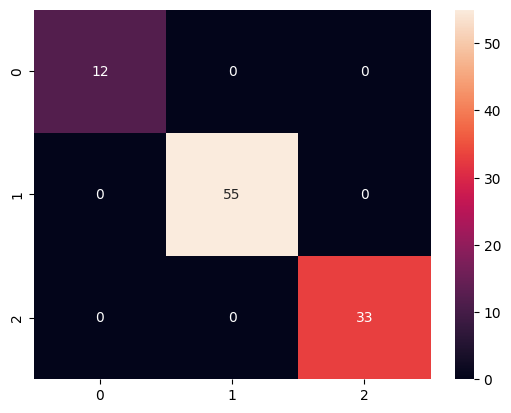

In [8]:
sns.heatmap(confusion_matrix(randomForestModel.predict(x_test), y_test), annot=True)

<Axes: >

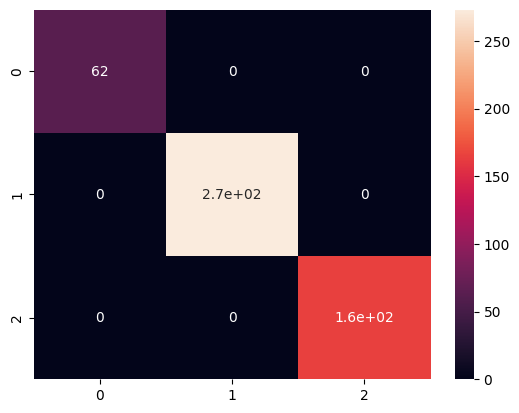

In [9]:
sns.heatmap(confusion_matrix(randomForestModel.predict(x_train), y_train), annot=True)

In [ ]:
pkl.dump(randomForestModel, open("Random_Forest_Model.sav", 'wb'))